In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:00<00:00, 163MB/s]
100% 149M/149M [00:00<00:00, 171MB/s]


In [5]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it's a directory
    if os.path.isdir(label_path):
      #Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class':classes
  })

  return df

In [6]:
tr_df = get_class_paths("/content/Training")

In [7]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [8]:
ts_df = get_class_paths("/content/Testing")

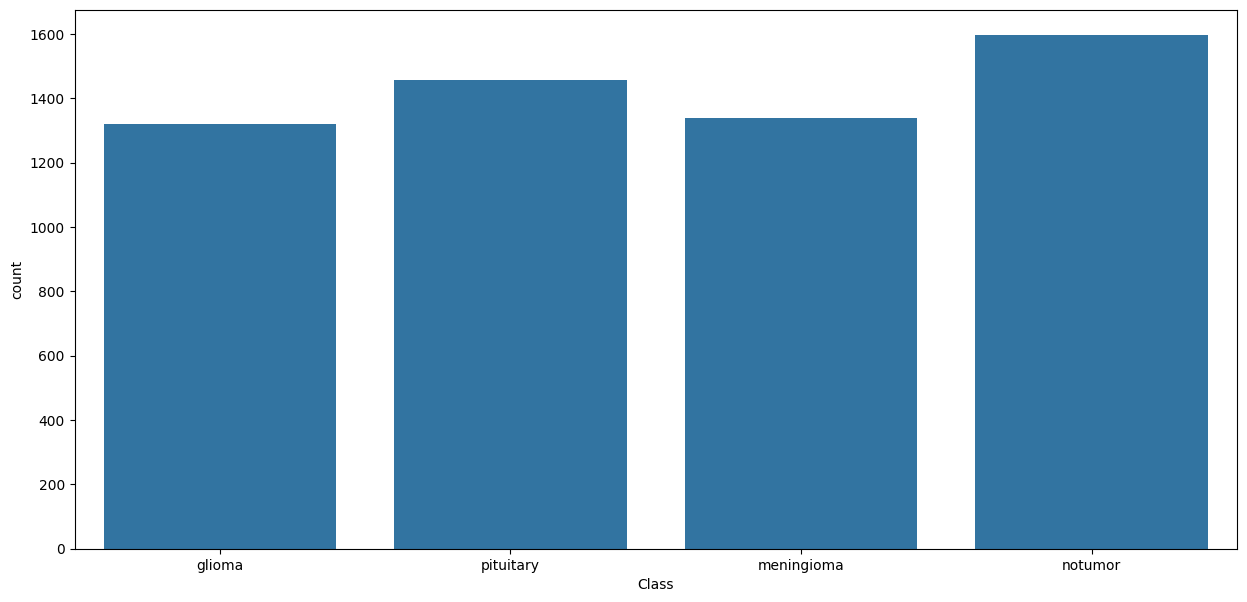

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

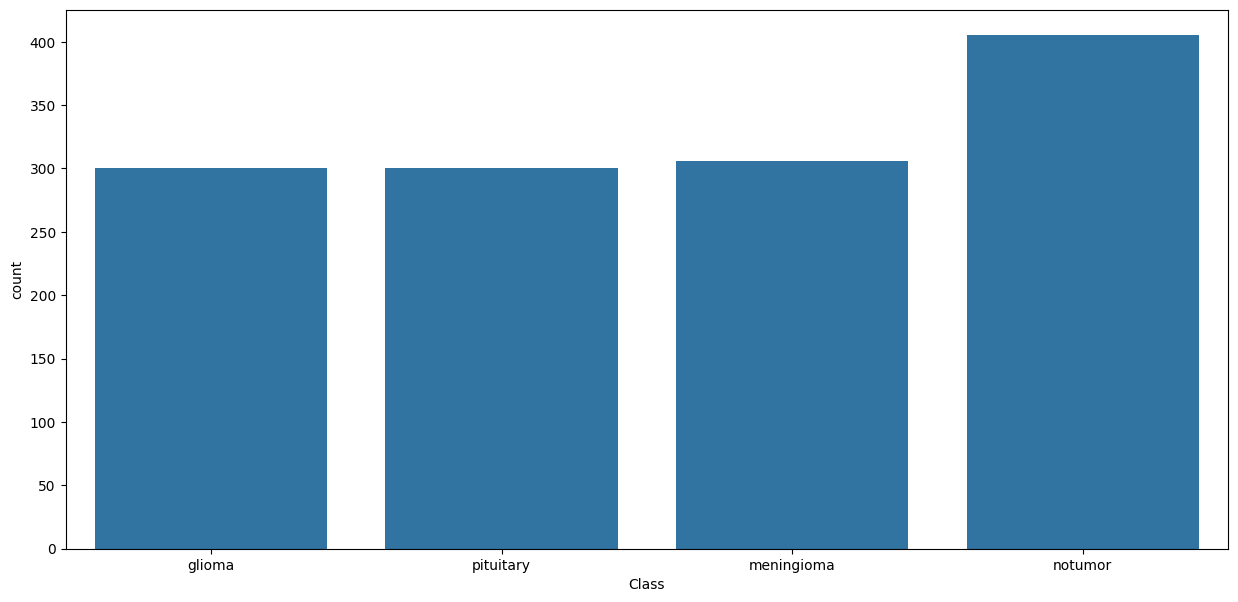

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [13]:
valid_df

,Class Path,Class
991,/content/Testing/notumor/Te-no_0082.jpg,notumor
913,/content/Testing/notumor/Te-no_0176.jpg,notumor
99,/content/Testing/glioma/Te-gl_0264.jpg,glioma
627,/content/Testing/meningioma/Te-me_0086.jpg,meningioma
405,/content/Testing/pituitary/Te-pi_0079.jpg,pituitary
...,...,...
529,/content/Testing/pituitary/Te-pi_0108.jpg,pituitary
1035,/content/Testing/notumor/Te-no_0231.jpg,notumor
865,/content/Testing/meningioma/Te-me_0277.jpg,meningioma
533,/content/Testing/pituitary/Te-pi_0177.jpg,pituitary


In [14]:
ts_df

,Class Path,Class
1284,/content/Testing/notumor/Te-no_0081.jpg,notumor
1120,/content/Testing/notumor/Te-no_0071.jpg,notumor
443,/content/Testing/pituitary/Te-pi_0053.jpg,pituitary
660,/content/Testing/meningioma/Te-me_0170.jpg,meningioma
922,/content/Testing/notumor/Te-no_0338.jpg,notumor
...,...,...
62,/content/Testing/glioma/Te-gl_0032.jpg,glioma
658,/content/Testing/meningioma/Te-me_0107.jpg,meningioma
1289,/content/Testing/notumor/Te-no_0252.jpg,notumor
144,/content/Testing/glioma/Te-gl_0251.jpg,glioma


In [15]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


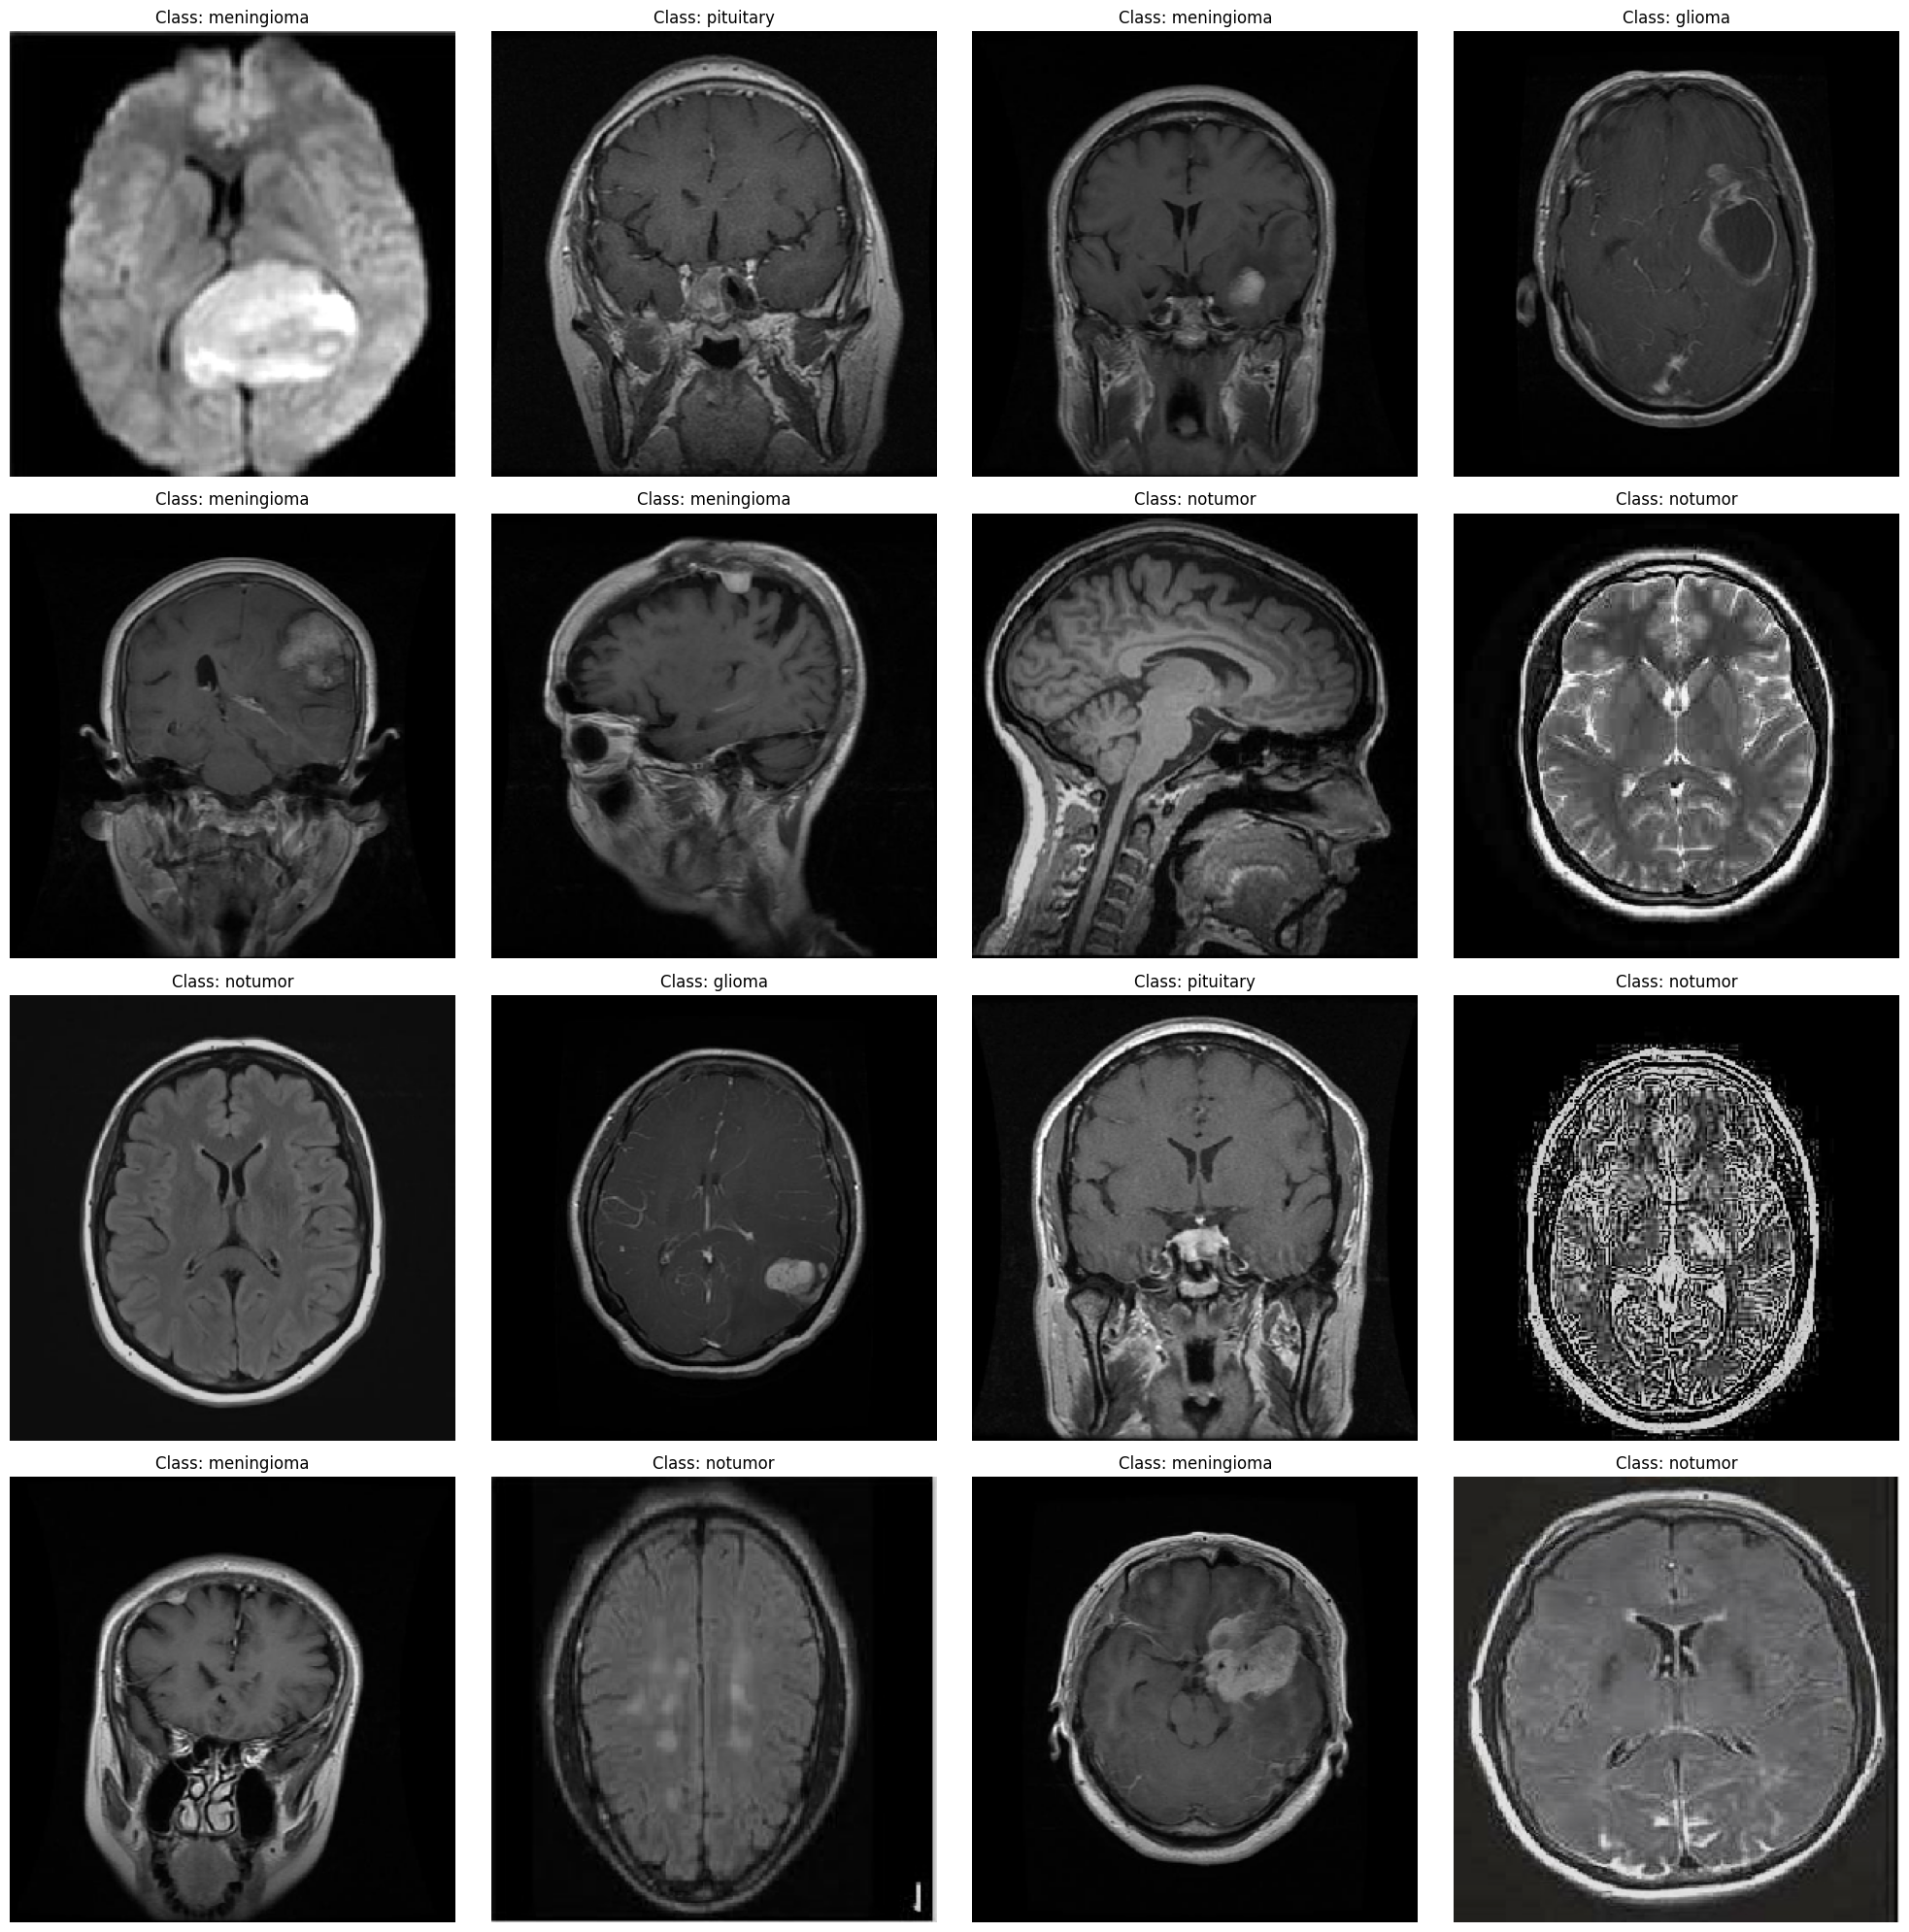

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #Get the class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  #Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  #Get the class name using the index_position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (224, 224, 3)

base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

base_model = tf.keras.applications.ResNet50(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

base_model = tf.keras.applications.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')


model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen, validation_data= valid_gen, epochs= 5)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 136ms/step - accuracy: 0.7509 - loss: 1.4366 - precision_4: 0.7571 - recall_4: 0.7421 - val_accuracy: 0.3206 - val_loss: 1.4447 - val_precision_4: 0.4236 - val_recall_4: 0.1481
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.9188 - loss: 0.2141 - precision_4: 0.9281 - recall_4: 0.9113 - val_accuracy: 0.8214 - val_loss: 0.4506 - val_precision_4: 0.8612 - val_recall_4: 0.7863
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9492 - loss: 0.1398 - precision_4: 0.9564 - recall_4: 0.9461 - val_accuracy: 0.9695 - val_loss: 0.0732 - val_precision_4: 0.9709 - val_recall_4: 0.9664
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9748 - loss: 0.0787 - precision_4: 0.9767 - recall_4: 0.9729 - val_accuracy: 0.9725 - val_loss: 0.0628 - val_precision_4: 0.9725 - val_recall_4: 0.9725
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 34s 95ms/step - accuracy: 0.9805 - loss: 0.0612 - precision_4: 0.9813 - recall_4: 0

In [ ]:
model.save("efficientnet_model.weights.h5")

In [ ]:
#Get training and validation metrics from history
metrics = ['accuracy','loss','precision','recall']
train_metrics = {m:hist.history[m] for m in metrics}
valid_metrics = {m:hist.history[f'val_{m}'] for m in metrics}

# train_metrics_df = pd.DataFrame(train_metrics)
# valid_metrics_df = pd.DataFrame(valid_metrics)

#find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(valid_metrics[m])
  else:
    idx = np.argmax(valid_metrics[m])
  best_epochs[m] = idx
  best_values[m] = valid_metrics[m][idx]

#Plot metrics
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')

for i,metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(train_metrics[metric])+1)

  plt.plot(epochs,train_metrics[metric] , 'r' ,label = f'Training {metric}' )
  plt.plot(epochs,valid_metrics[metric] , 'g' , label = f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',label = f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)


plt.suptitle('Training and Validation Metrics',fontsize = 15)
plt.show()

In [ ]:
#evaluating models
train_score = model.evaluate(tr_gen,verbose = 1)
valid_score = model.evaluate(valid_gen,verbose = 1)
test_score = model.evaluate(ts_gen,verbose = 1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Training loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTesting Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing loss: {test_score[0]:.4f}")

In [ ]:
#To predict where our model is succes and where it is making mistakes
preds = model.predict(ts_gen) # model is generating the probability values fro each class based on testing data
y_preds = np.argmax(preds,axis = 1) #selecting the maximum probability distribution class and converting these probability values to actual predictions.

class_dict = {
    0 : "glioma",
    1 : "meningioma",
    2 : "notumor",
    3 : "pituitary"
}

#Create and display the confusion matrix - this matrix will show how many predictions were correct and incorrect for each class.
cm = confusion_matrix(ts_gen.classes,y_preds)
labels = list(class_dict.keys())
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True,fmt = 'd',xticklabels = labels,yticklabels = labels,cmap = 'Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#visualize the predictions of our model on a few test images
from PIL import Image

def predict(image_path:str ) -> None:
  #Get the class labels
  labels = list(class_dict.keys())

  #create figure
  plt.figure(figsize = (6,8))

  #load and pre-process image
  img = Image.open(image_path)
  resized_image = img.resize((299,299))
  image_array = np.asarray(resized_image)
  image_array = np.expand_dims(image_array,axis = 0) / 255.0

  #Get model predictions
  predictions = model.predict(image_array)
  probabilities = list(predictions[0])

  #Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  #plot original image
  plt.subplot(2,1,1)
  plt.imshow(resized_image)
  plt.title(f"Original Input MRI Image\n Predicted : {predicted_class}")

  #plot prediction probabilities
  plt.subplot(2,1,2)
  bars = plt.barh(labels,probabilities)
  plt.xlabel("Probability",fontsize = 15)
  plt.title("Class Probabilities")

  #Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars,fmt = "%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

CNN Architecture

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [17]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size)

ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', target_size=img_size, batch_size=batch_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [23]:
from keras.layers import BatchNormalization, GlobalAveragePooling2D
# Create a Sequential Model

cnn_model = Sequential()

#Convolutional Layers

cnn_model.add(Conv2D(512, (3, 3), activation= 'relu', input_shape= (224, 224, 3), padding='same'))
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))

cnn_model.add(Conv2D(256, (3, 3), activation= 'relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))
cnn_model.add(Dropout(0.15))

cnn_model.add(Conv2D(128, (3, 3), activation= 'relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))
cnn_model.add(Dropout(0.15))

cnn_model.add(Conv2D(64, (3, 3), activation= 'relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))

#Flatten the output for Fully Connected Layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense(256, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)))
cnn_model.add(Dropout(0.40))

cnn_model.add(Dense(4, activation= 'softmax')) #Output layers with 4 neurons for the 4 classes

#Compile the model
cnn_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

#Display the model summary
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,777,156 (18.22 MB)

 Trainable params: 4,776,388 (18.22 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = cnn_model.fit(tr_gen, validation_data= valid_gen, epochs= 10, callbacks=[lr_scheduler])

In [ ]:
cnn_model.save("cnn_model.h5")

In [28]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [29]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [30]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [31]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [39]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()
from openai import OpenAI
import base64

# genai.configure(api_key= os.getenv("GOOGLE_API_KEY"))
# st.write('## Explanation')
# client= OpenAI(
#   base_url = "https://api.groq.com/openai/v1",
#   api_key = os.environ.get("GROQ_API_KEY")
# )

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_saliency_map(model, img_array, class_index, img_shape, uploaded_file):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  #Resize the gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  #Create a circular mask for brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y-center[1])**2 <= radius**2

  #Apply mask to gradients
  gradients = gradients * mask

  #Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  #Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11,11), 0)

  #Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  #Resize heatmap to match original image array
  heatmap = cv2.resize(heatmap, img_size)

  #Superimpose the heatmap on original image with increased capacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f"saliency_maps/{uploaded_file.name}"

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

  return superimposed_img

def load_xception_model(model_path):
  img_shape = (299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

  model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

  model.build((None,) + img_shape)
  #Compile the Model
  model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")
st.write("Upload an image to classify brain tumor")
uploaded_file = st.file_uploader("Choose an image ...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  # Convert the file to an opencv image

  selected_model = st.radio("Select Model", ("Transfer Learning - Xception", "Custom CNN"))

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299, 299)
  else:
    model = load_model("/content/cnn_model.h5")
    img_size = (224, 224)

  labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  #Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.2f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size, uploaded_file)

  col1, col2 = st.columns(2)
  with col1:
    st.image(img, caption="Uploaded Image", use_container_width=True)
  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)

  st.write("## Classificatio Results")

  st.write("Explanation")
  st.write("The saliency map for the Glioma tumor highlights regions of abnormal tissue characterized by irregular patterns in the brain's gray and white matter interface. The model primarily focuses on areas with increased cellular density and atypical vascularization, indicative of tumor growth. This visualization aligns with clinical observations of Glioma's infiltrative nature, often impacting nearby functional brain regions. The saliency map's emphasis on these areas aids in localizing the tumor's boundaries, providing critical insights for treatment planning and surgical intervention.")


Overwriting app.py


In [41]:
thread = Thread(target=run_streamlit)
thread.start()

In [42]:
public_url = ngrok.connect(addr= "8501", proto= "http", bind_tls= True)
print("Public URL", public_url)

Public URL NgrokTunnel: "https://6c06-35-230-188-135.ngrok-free.app" -> "http://localhost:8501"


In [40]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://7990-35-230-188-135.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://a95b-35-230-188-135.ngrok-free.app -> http://localhost:8501
